In [1]:
from keras.models import Model
from keras.layers import Input, Flatten, Dense
from keras.applications import VGG16

# Input shape
input_shape = (224, 224, 3)  

# input tensor
input_tensor = Input(shape=input_shape)

# Load pre-trained VGG16 
base_model = VGG16(weights='imagenet', include_top=False, input_tensor=input_tensor)

# Freeze the layers in the base VGG16 model
for layer in base_model.layers:
    layer.trainable = False

# Flatten the output of VGG16 and add a fully connected layer
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
# Add output layer with 5 classes and softmax activation
predictions = Dense(5, activation='softmax')(x)

# Create the full model
model = Model(inputs=base_model.input, outputs=predictions)

# Print model summary
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,562,821 (105.14 MB)

 Trainable params: 12,848,133 (49.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [21]:
from keras.optimizers import Adam



In [4]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [5]:
BATCH_SIZE = 16
IMAGE_SIZE = [224, 224]
CHANNELS=3
EPOCHS=18

In [6]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "retinopathy",
    shuffle=True,
    image_size=(IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 3662 files belonging to 5 classes.


In [7]:
class_names=dataset.class_names
print(class_names)

['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']


In [8]:
len(dataset)

229

In [9]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.shape)

(16, 224, 224, 3)
(16,)


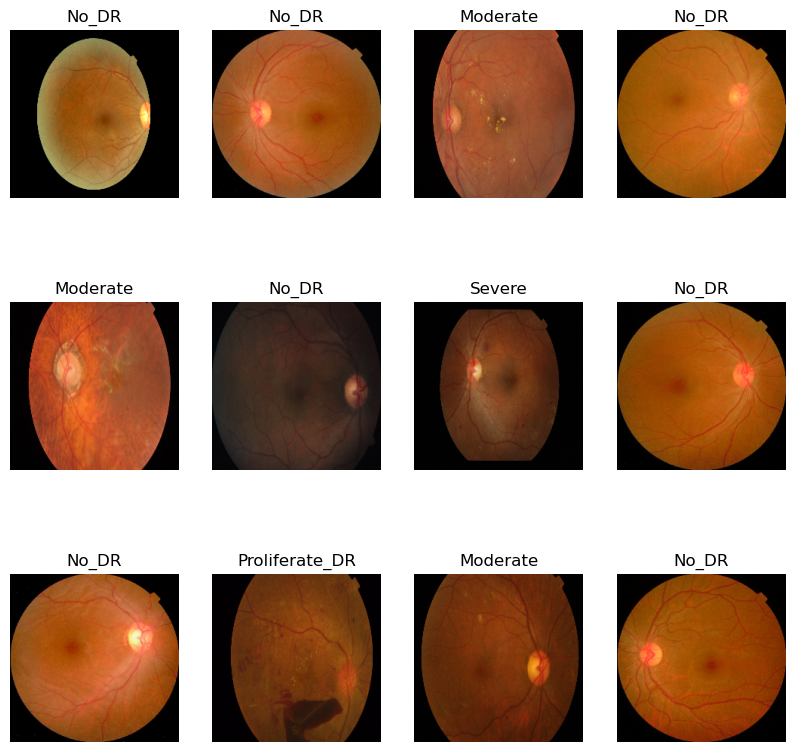

In [10]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [11]:
train_size = 0.8
len(dataset)*train_size

183.20000000000002

In [12]:
train_ds = dataset.take(183)
len(train_ds)

183

In [13]:
test_ds = dataset.skip(183)
len(test_ds)

46

In [14]:
val_ds = test_ds.take(18)
len(val_ds)

18

In [15]:
test_ds = test_ds.skip(18)
len(test_ds)

28

In [16]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [17]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [18]:
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    tf.keras.layers.Rescaling(1./255),
])

In [19]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
])

In [22]:
from keras.optimizers import Adam

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])


In [23]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/18
183/183 ━━━━━━━━━━━━━━━━━━━━ 496s 3s/step - accuracy: 0.6441 - loss: 14.2714 - val_accuracy: 0.8097 - val_loss: 0.8855
Epoch 2/18
183/183 ━━━━━━━━━━━━━━━━━━━━ 518s 3s/step - accuracy: 0.8360 - loss: 0.6103 - val_accuracy: 0.8608 - val_loss: 0.3136
Epoch 3/18
183/183 ━━━━━━━━━━━━━━━━━━━━ 573s 3s/step - accuracy: 0.8655 - loss: 0.3791 - val_accuracy: 0.9119 - val_loss: 0.2426
Epoch 4/18
183/183 ━━━━━━━━━━━━━━━━━━━━ 549s 3s/step - accuracy: 0.9026 - loss: 0.2745 - val_accuracy: 0.9574 - val_loss: 0.1699
Epoch 5/18
183/183 ━━━━━━━━━━━━━━━━━━━━ 571s 3s/step - accuracy: 0.9315 - loss: 0.2040 - val_accuracy: 0.9574 - val_loss: 0.1341
Epoch 6/18
183/183 ━━━━━━━━━━━━━━━━━━━━ 575s 3s/step - accuracy: 0.9374 - loss: 0.1885 - val_accuracy: 0.9432 - val_loss: 0.1724
Epoch 7/18
183/183 ━━━━━━━━━━━━━━━━━━━━ 593s 3s/step - accuracy: 0.9444 - loss: 0.1742 - val_accuracy: 0.9773 - val_loss: 0.0733
Epoch 8/18
183/183 ━━━━━━━━━━━━━━━━━━━━ 547s 3s/step - accuracy: 0.9514 - loss: 0.1451 - val_acc

In [24]:
scores = model.evaluate(test_ds)

24/24 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.9779 - loss: 0.1129


In [25]:
scores

[0.09319707006216049, 0.9765625]

In [26]:
history

In [27]:
history.history['loss'][:18]

[6.010640621185303,
 0.601549506187439,
 0.390647292137146,
 0.2647797763347626,
 0.19529631733894348,
 0.18547135591506958,
 0.17726270854473114,
 0.1740230917930603,
 0.12943021953105927,
 0.15833842754364014,
 0.15020161867141724,
 0.12813825905323029,
 0.10563613474369049,
 0.09762377291917801,
 0.07116199284791946,
 0.09437401592731476,
 0.06334558874368668,
 0.08235740661621094]

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

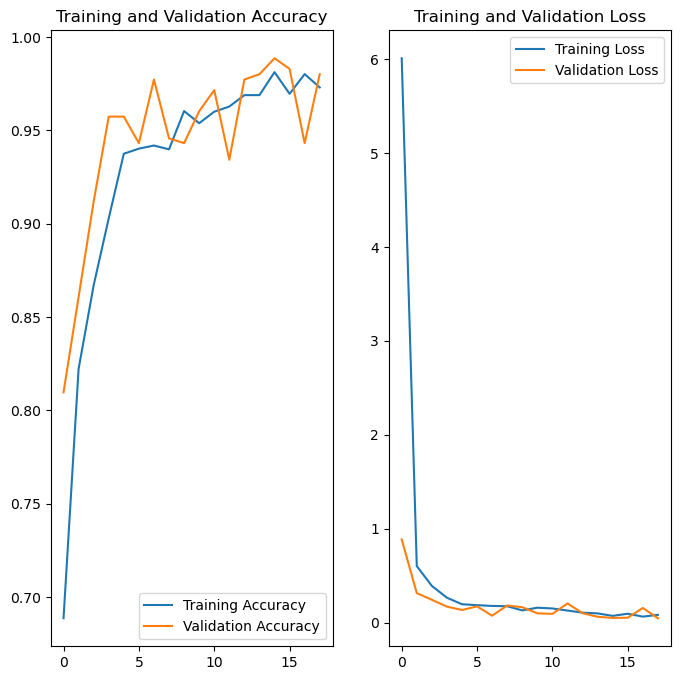

In [29]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: No_DR
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
predicted label: No_DR


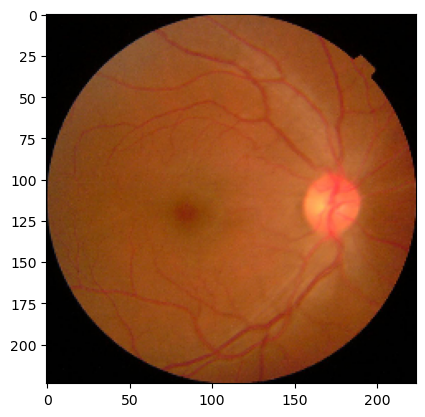

In [30]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [31]:
model.save("vgg16e18.h5")

In [32]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Initialize lists to store ground truth labels and predictions
y_true_all = []
y_pred_all = []

# Iterate over all batches in the test dataset
for images_batch, labels_batch in test_ds:
    # Collect ground truth labels
    for label in labels_batch.numpy():
        y_true_all.append(label)
    
    # Make predictions
    predictions = model.predict(images_batch)
    for prediction in predictions:
        y_pred_all.append(np.argmax(prediction))

# Calculate precision, recall, and F1-score
precision = precision_score(y_true_all, y_pred_all, average='macro')
recall = recall_score(y_true_all, y_pred_all, average='macro')
f1 = f1_score(y_true_all, y_pred_all, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Generate a classification report
report = classification_report(y_true_all, y_pred_all)
print("\nClassification Report:")
print(report)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Precision: 0.9526889066996018
Recall: 0.9568095956331251
F1-score: 0.9537593984962405

Classification Report:
              precision   

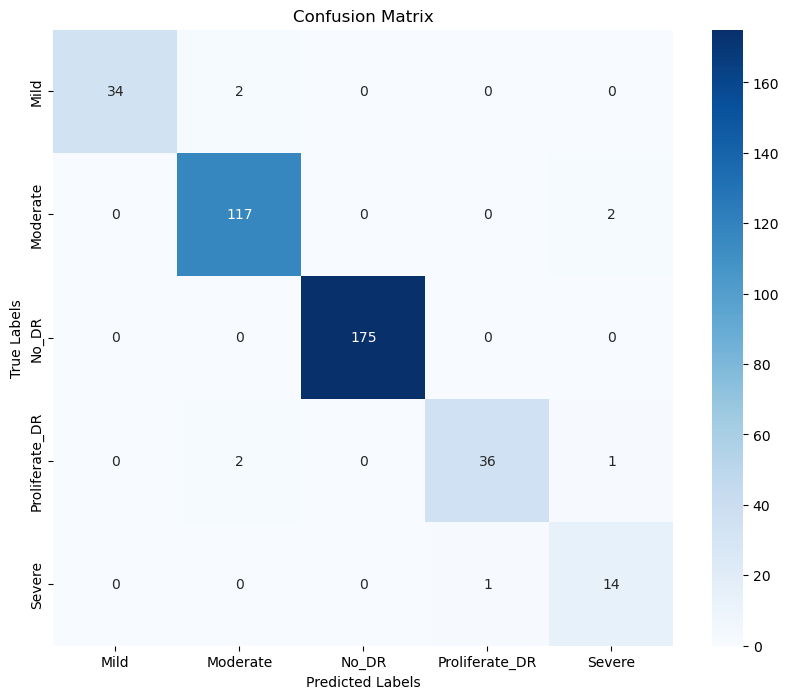

In [33]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_true_all, y_pred_all)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()